# CMSC471 Artificial Intelligence

# Project Final Submission

## "Catch Me If You Can: Using ML to Detect Financial Fraud"

## Problem Description

This project uses binary classification to organize financial transactions into one of two classes: fraud and not-fraud. This project uses both simple binary classification with SciKit Learn and neural networks with Tensorflow. 

The background to this project involves a particular way that financial fraud occurs: when a cyber criminal obtains access to a victim's account and drains the victim's funds into the criminal's own account. Incident response for this particular fraud is difficult. For financial analysts, sifting through records of transactions for illicit activity can be a needle-in-a-haystack problem. This ML project proposes a potential solution: train a model to detect behavior that is suspicious and flag it for further review by an expert analyst.

For this dataset, we are given the following problem: we have two accounts (an origin account and a destination account), the type of transaction that is made from the origin account to the destination account, the balance change from the origin account to the destination account, the amount transmitted, and a flag indicating whether the movement of crash to/from one account to another is fraudulent (that is, if the attacker - the destination account - is draining the origin's account and cashing out with $200.00 or more, the transaction will be flagged as fraudulent). 

A good result for this experiment would be to have a model that has a reasonably high recall rate (say, above 0.50). The higher the recall rate, the better the model is at avoiding False Negatives - meaning, the model is less likely to classify truly fraudulent transactions as 'not-fraud'. In the trade-off between recall and precision, this is imperative: a system that is sensitive and alerts financial analysts to suspicious activity that is not in fact truly fraudulent is more likely to capture truly fraudulent activity; however, a system that classifies truly fraudulent transactions as 'not-fraudulent' can only hurt the institution. A core objective of this project, then, is to get a model with a high recall rate. 


## Motivation

I find this particular problem interesting for two reasons: 1) I am an employee at T. Rowe Price, one of the top financial asset managers in the world that manages over 1 trillion U.S. dollars of financial assets and has strict policies on financial fraud; and, 2) I am invested in cyber security as a means for protecting customer accounts.


## Dataset


Link to dataset source: https://www.kaggle.com/ntnu-testimon/paysim1/download

The size of the dataset is 471 MB. This size has been approved by Professor Fereydoon Vafaei.

### Label/target description: 
The most important part of this dataset is the "isFraud" label. This will be used to label certain activity as fraudulent or not-fraudulent during Training.

### Feature description: 
The dataset includes the following features organized in columns for ML Classification:

The "Type" of transaction made from one account to another (i.e. Payment, Debit, Cash-Out, etc.).

The "Amount" of cash transmitted from one account the another (from the Origin to the Destination).

The Origin Name and Destination Name (respective, "nameOrig" and "nameDest"). This is supposed to be the two accounts that we are focused on.

A change in balance for both the Origin account and Destination account (oldbalanceOrg, newbalanceOrg, oldbalanceDest, newbalanceDest).

A "isFlaggedFraud" column. This column does not appear to serve any real purpose in either Training or Testing. It appears that this is used to record whether or not the model was able to flag fraudulent accounts correctly or not inside the original CSV file after the experiment has been run. This column will be dropped. 

See below for data and library importation.

In [1]:
# Import necessary Python, sklearn and/or tensorflow/keras modules for loading the dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


# Load the data
fraud_data = pd.read_csv('FraudData.csv', sep=',', header=0, index_col=False)

# Only 30,000 entries of the 6 million available entries will be used (see Discussion section for why)
fraud_data = fraud_data.head(30000)

# Print the data-shape
print(fraud_data.shape)

(30000, 11)


## Data Preprocessing

For the data pre-processing steps, the following must occur before we can even use SciKit Learn or Tensorflows Neural Networks:

1) The column known as "isFlaggedFraud" must be dropped. There is no apparent need for this feature. It is just a column of 0s that appear to be used by researchers for physical recordings of the predictions made by the fitted models. It cannot build the models in any meaningful way.

2) The data-types that are classified as "objects" must be converted to an integer or float data-type in order to be fitted to the model.

3) Two variables must be created: one that will hold the features, another that will hold the label.

4) The variables in part 3 above will be used to split the data set so that 67% of the full data-set is used to train the model, with the other 33% being used for testing. 

In [2]:
# 1) Drop the isFlaggedFraud column - it's not necessary here
fraud_data.drop('isFlaggedFraud', axis=1, inplace=True)

# 2) Convert the objects
fraud_data['type'] = pd.Categorical(fraud_data.type).codes
fraud_data['nameOrig'] = pd.Categorical(fraud_data.nameOrig).codes
fraud_data['nameDest'] = pd.Categorical(fraud_data.nameDest).codes

# 3) Create X and y variables
X = fraud_data.drop('isFraud', axis=1)
y = fraud_data['isFraud']

# 4) Split the data to train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20100, 9)
(20100,)
(9900, 9)
(9900,)


## Methods

1) Sklearn Method No.1: Stochastic Gradient Descent (SGD) <br>
2) Sklearn Method No.2: Random Forest (RF) <br>
3) Tensorflow Method: SGD <br>

### SKLearn Method 1: Stochastic Gradient Descent (SGD)

Below is the code for building SGD Classifier models. Three total SGD Classifier models were built. Each has a hyperparameter tuned. The hyperparameter is the alpha parameter. The alpha parameter can minimize the 'loss' of the overall function. The default configuration for this hyperparameter is 0.00001. The first uses the default, the second uses an alpha value of 0.00100, and the third uses and alpha value of 1.0000. 

The ROC curve plots comparing each of the SGD Classifiers is then shown as a visual for how hyperparameter tuning affects the ROC curve plot. This should be used to see which of the three SGD Classifiers is better. 

In [3]:
# Create a set of 3 SGD Classifier models


# Use hyperparameter tuning. The hyperparameter to be tuned will be the alpha parameter. 
# The default is 0.00001. This alpha parameter will be adjusted to 0.00100, and then to
# 1.0000. 


# SGD Classifier with hyperparameter alpha value 0.00001
sgd_clf = SGDClassifier(loss='hinge', alpha=0.00001)
sgd_clf.fit(X_train,y_train)
sgd_preds = sgd_clf.decision_function(X_test)
sgd_fpr, sgd_tpr, sgd_threshold = metrics.roc_curve(y_test, sgd_preds)
sgd_roc_auc = metrics.auc(sgd_fpr, sgd_tpr)

# SGD Classifier with hyperparameter alpha value 0.00100
sgd_clf_two = SGDClassifier(loss='hinge', alpha=0.00100)
sgd_clf_two.fit(X_train,y_train)
sgd_preds_two = sgd_clf_two.decision_function(X_test)
sgd_fpr_two, sgd_tpr_two, sgd_threshold_two = metrics.roc_curve(y_test, sgd_preds_two)
sgd_roc_auc_two = metrics.auc(sgd_fpr_two, sgd_tpr_two)

# SGD Classifier with hyperparameter alpha value 1.00000
sgd_clf_three = SGDClassifier(loss='hinge', alpha=1.00000)
sgd_clf_three.fit(X_train,y_train)
sgd_preds_three = sgd_clf_three.decision_function(X_test)
sgd_fpr_three, sgd_tpr_three, sgd_threshold_three = metrics.roc_curve(y_test, sgd_preds_three)
sgd_roc_auc_three = metrics.auc(sgd_fpr_three, sgd_tpr_three)

Text(0.5, 0, 'False Positive Rate')

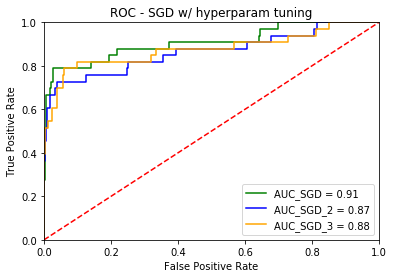

In [5]:
plt.title('ROC - SGD w/ hyperparam tuning')
plt.plot(sgd_fpr, sgd_tpr, 'b', label = 'AUC_SGD = %0.2f' % sgd_roc_auc, color='green')
plt.plot(sgd_fpr_two, sgd_tpr_two, 'b', label = 'AUC_SGD_2 = %0.2f' % sgd_roc_auc_two, color='blue')
plt.plot(sgd_fpr_three, sgd_tpr_three, 'b', label = 'AUC_SGD_3 = %0.2f' % sgd_roc_auc_three, color='orange')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### SKLearn Method 2: Logistic Regression

Below is the code for the SKLearn Logistic Regression models. There are three created: each one has a hyperparameter tuned. The hyperparameter chosen for tuning was the regularization factor. The first does not use any regularization, the second uses the L1 norm, and the third uses the L2 norm.

Below the code is the ROC curve plot meant for comparing each of these three Logistic Regression models to see how hyperparameter tuning affects each of the models and to see which has a better AUC. 

In [6]:
# Create a set of 3 LogisticRegression models

# Use hyperparameter tuning. The hyperparameter to be tuned will be the regularizer. 
# The first will use no regularization. The second will use Lasso (L1 norm). The third will use
# Ridge (L2 norm).



# Logistic Regression with NO regularization
logreg_clf=LogisticRegression(solver='sag', penalty='none')

logreg_clf.fit(X_train,y_train)
logreg_probs = logreg_clf.predict_proba(X_test)
logreg_preds = logreg_probs[:,1]
logreg_fpr, logreg_tpr, logreg_threshold = metrics.roc_curve(y_test, logreg_preds)
logreg_roc_auc = metrics.auc(logreg_fpr, logreg_tpr)


# Logistic Regression with L1 norm (Lasso)
logreg_clf_2=LogisticRegression(solver='liblinear', penalty='l1')

logreg_clf_2.fit(X_train,y_train)
logreg_probs_2 = logreg_clf_2.predict_proba(X_test)
logreg_preds_2 = logreg_probs_2[:,1]
logreg_fpr_2, logreg_tpr_2, logreg_threshold_2 = metrics.roc_curve(y_test, logreg_preds_2)
logreg_roc_auc_2 = metrics.auc(logreg_fpr_2, logreg_tpr_2)


# Logistic Regression with L2 norm (Ridge)
logreg_clf_3=LogisticRegression(solver='liblinear', penalty='l2')

logreg_clf_3.fit(X_train,y_train)
logreg_probs_3 = logreg_clf_3.predict_proba(X_test)
logreg_preds_3 = logreg_probs_3[:,1]
logreg_fpr_3, logreg_tpr_3, logreg_threshold_3 = metrics.roc_curve(y_test, logreg_preds_3)
logreg_roc_auc_3 = metrics.auc(logreg_fpr_3, logreg_tpr_3)

Text(0.5, 0, 'False Positive Rate')

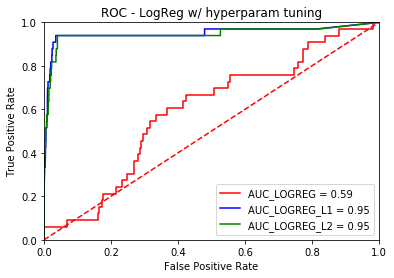

In [7]:
plt.title('ROC - LogReg w/ hyperparam tuning')
plt.plot(logreg_fpr, logreg_tpr, 'b', label = 'AUC_LOGREG = %0.2f' % logreg_roc_auc, color='red')
plt.plot(logreg_fpr_2, logreg_tpr_2, 'b', label = 'AUC_LOGREG_L1 = %0.2f' % logreg_roc_auc_2, color='blue')
plt.plot(logreg_fpr_3, logreg_tpr_3, 'b', label = 'AUC_LOGREG_L2 = %0.2f' % logreg_roc_auc_3, color='green')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Tensorflow Method: Sequential Network with Adam optimizer

The final model here uses Tensorflow to build a Sequential Neural Network.

In [8]:
# Create a Sequential Network with SGD optimizer 

# Load train and test data to tf
train_tensor = tf.data.Dataset.from_tensor_slices((X_train.values,y_train.values))
test_tensor = tf.data.Dataset.from_tensor_slices((X_test.values,y_test.values))

train_batch = train_tensor.shuffle(len(X_train)).batch(1)
test_batch = test_tensor.shuffle(len(X_test)).batch(1)

EPOCHS = 100

# Create neural network using Stochastic Gradient Descent
# SGD is efficient at processing large datasets
# The activation function for the final layer is 'sigmoid' because
# this particular problem is a binary classifier.
nn_clf = tf.keras.Sequential([
    tf.keras.layers.Dense(200, input_dim=9, activation='relu'),
    
    tf.keras.layers.Dense(100, activation='relu'),
    
    tf.keras.layers.Dense(100, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

nn_clf.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
#NOTE: for sanity check, try setting epoch=2 just to check that it can finish successfully
nn_clf_history=nn_clf.fit(train_batch,epochs=EPOCHS)

Epoch 1/100
20100/20100 [==============================] - 116s 6ms/step - loss: 324.7440 - accuracy: 0.9952tep - loss: 327.2021 -  - 115s 6ms/step - loss: 3  - 116s 6ms/step - loss: 324.8409 - accuracy:
Epoch 2/100
20100/20100 [==============================] - 73s 4ms/step - loss: 103.9476 - accuracy: 0.9956
Epoch 3/100
20100/20100 [==============================] - 72s 4ms/step - loss: 177.6248 - accuracy: 0.9959
Epoch 4/100
20100/20100 [==============================] - 78s 4ms/step - loss: 7.7171 - accuracy: 0.9948
Epoch 5/100
20100/20100 [==============================] - 76s 4ms/step - loss: 11.5588 - accuracy: 0.9943
Epoch 6/100
20100/20100 [==============================] - 74s 4ms/step - loss: 0.5060 - accuracy: 0.9969
Epoch 7/100
20100/20100 [==============================] - 77s 4ms/step - loss: 3.7742 - accuracy: 0.9971
Epoch 8/100
20100/20100 [==============================] - 79s 4ms/step - loss: 6.4526 - accuracy: 0.9966
Epoch 9/100
20100/20100 [========================

In [10]:
nn_clf.evaluate(test_batch)

9900/9900 [==============================] - 32s 3ms/step - loss: 32.3684 - accuracy: 0.9967


[32.368390888774655, 0.99666667]

In [11]:
nn_preds = nn_clf.predict(X_test).ravel()

## Results

### Comparison Table

| Metric/ Method  | SGD Class  | LogReg Class  | Tensorflow   |   |
|---|---|---|---|---|
|Accuracy| 0.99   |  0.99  |  0.99 |   |
|Recall | 0.48  |  0.48 | 0.48  |   |
|   |   |   |   |   |

### Plots

#### SKLearn SGD vs. Logistic Regression ROC Curve

This plot compares the SGD Classifier (alpha parameter = 0.00001) to the Logistic Regression model (L1 norm regularization) to see which one is better. 

Text(0.5, 0, 'False Positive Rate')

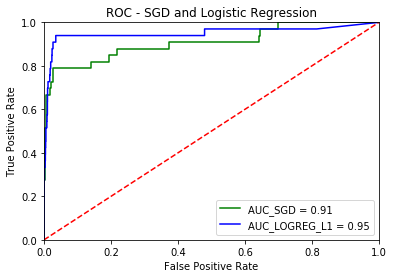

In [16]:
plt.title('ROC - SGD and Logistic Regression')
plt.plot(sgd_fpr, sgd_tpr, 'b', label = 'AUC_SGD = %0.2f' % sgd_roc_auc, color='green')
plt.plot(logreg_fpr_2, logreg_tpr_2, 'b', label = 'AUC_LOGREG_L1 = %0.2f' % logreg_roc_auc_2, color='blue')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

##### SGD Accuracy and Recall

In [13]:
y_sgdpred = sgd_clf.predict(X_test)
y_sgdpred2 = sgd_clf_two.predict(X_test)
y_sgdpred3 = sgd_clf_three.predict(X_test)


print('SGD - alpha = 0.00001, accuracy = ', accuracy_score(y_test, y_sgdpred))
print('SGD - alpha = 0.00100, accuracy = ', accuracy_score(y_test, y_sgdpred2))
print('SGD - alpha = 1.00000, accuracy = ', accuracy_score(y_test, y_sgdpred3))

print('SGD - alpha = 0.00001, precision = ', precision_score(y_test, y_sgdpred, pos_label=1))
print('SGD - alpha = 0.00100, precision = ', precision_score(y_test, y_sgdpred2, pos_label=1))
print('SGD - alpha = 1.00000, precision = ', precision_score(y_test, y_sgdpred3, pos_label=1))

print('SGD - alpha = 0.00001, recall = ', recall_score(y_test, y_sgdpred, pos_label=1))
print('SGD - alpha = 0.00100, recall = ', recall_score(y_test, y_sgdpred2, pos_label=1))
print('SGD - alpha = 1.00000, recall = ', recall_score(y_test, y_sgdpred3, pos_label=1))

SGD - alpha = 0.00001, accuracy =  0.9949494949494949
SGD - alpha = 0.00100, accuracy =  0.9964646464646465
SGD - alpha = 1.00000, accuracy =  0.9971717171717172
SGD - alpha = 0.00001, precision =  0.32653061224489793
SGD - alpha = 0.00100, precision =  0.4642857142857143
SGD - alpha = 1.00000, precision =  0.7272727272727273
SGD - alpha = 0.00001, recall =  0.48484848484848486
SGD - alpha = 0.00100, recall =  0.3939393939393939
SGD - alpha = 1.00000, recall =  0.24242424242424243


##### Logistic Regression Accuracy and Recall

In [15]:
y_logregpred = logreg_clf.predict(X_test)
y_logregpred2 = logreg_clf_2.predict(X_test)
y_logregpred3 = logreg_clf_3.predict(X_test)

print('Logistic Regression (no regularization), accuracy = ', accuracy_score(y_test, y_sgdpred))
print('Logistic Regression (L1 norm), accuracy = ', accuracy_score(y_test, y_sgdpred2))
print('Logistic Regression (L2 norm), accuracy = ', accuracy_score(y_test, y_sgdpred3))

print('Logistic Regression (no regularization), precision = ', precision_score(y_test, y_sgdpred, pos_label=1))
print('Logistic Regression (L1 norm), precision = ', precision_score(y_test, y_sgdpred2, pos_label=1))
print('Logistic Regression (L2 norm), precision = ', precision_score(y_test, y_sgdpred3, pos_label=1))

print('Logistic Regression (no regularization), recall = ', recall_score(y_test, y_sgdpred, pos_label=1))
print('Logistic Regression (L1 norm), recall = ', recall_score(y_test, y_sgdpred2, pos_label=1))
print('Logistic Regression (L2 norm), recall = ', recall_score(y_test, y_sgdpred3, pos_label=1))

Logistic Regression (no regularization), accuracy =  0.9949494949494949
Logistic Regression (L1 norm), accuracy =  0.9964646464646465
Logistic Regression (L2 norm), accuracy =  0.9971717171717172
Logistic Regression (no regularization), precision =  0.32653061224489793
Logistic Regression (L1 norm), precision =  0.4642857142857143
Logistic Regression (L2 norm), precision =  0.7272727272727273
Logistic Regression (no regularization), recall =  0.48484848484848486
Logistic Regression (L1 norm), recall =  0.3939393939393939
Logistic Regression (L2 norm), recall =  0.24242424242424243


#### Tensorflow Sequential NN 'Adam' Optimizer

Text(0.5, 0, 'False Positive Rate')

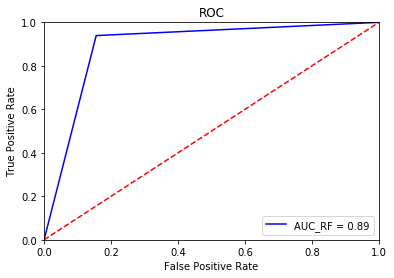

In [18]:
# Get class probabilities for nn - ignore the warning
nn_preds = nn_clf.predict(X_test).ravel()

# Get class probabilities, fpr, tpr and threshold for random forest.
nn_fpr, nn_tpr, nn_threshold = metrics.roc_curve(y_test, nn_preds)
nn_roc_auc = metrics.auc(nn_fpr, nn_tpr)

# Plot ROC curve.
plt.title('ROC')
plt.plot(nn_fpr, nn_tpr, 'b', label = 'AUC_RF = %0.2f' % nn_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [19]:
y_nn = logreg_clf.predict(X_test)

print('Tensorflow method, accuracy = ', accuracy_score(y_test, y_sgdpred))
print('Tensorflow method, precision = ', precision_score(y_test, y_sgdpred, pos_label=1))
print('Tensorflow method, recall = ', recall_score(y_test, y_sgdpred, pos_label=1))

Tensorflow method, accuracy =  0.9949494949494949
Tensorflow method, precision =  0.32653061224489793
Tensorflow method, recall =  0.48484848484848486


## Discussion

We now must analyze our models to see if they satisfy the goals we initially set out to do in the project's Problem Description at the top. We can evaluate the success (or failure) of the models based on their recall rates, as well as their overall accuracy. We can also evaluate how fine-tuning certain hyperparameters in our models affected these outcomes.
    
##### The Data-Set Size and Adverse Effects

Before jumping into the results, it's worth pointing out that only a portion of the total data-set size was actually used in this experiment. The original data-set consisted of over 6 million entries. It was found during this experiment that the Neural Network portion that used about 4 million entries for testing would take over 137 hours to complete. This, obviously, is not feasible since there is a time limit to this assignment. What was needed was a data-set size large enough to reasonably allow the models to make decent generalizations but also small enough for a Neural Network to build within just a few hours (this is so that I could troubleshoot errors and consider hyperparameter tuning in a timely manner). It was decided that 30,000 entries would be sufficient as a starting point. There are, of course, potential risks with doing this: the model may have too few entries to work with and may just "memorize" certain details without generalizing enough for testing. However, given the results above, I argue that 30,000 entries is a sufficient starting point (though, using more entries will be needed in the future to better fine-tune the models).
    
##### The Ojective: The Recall Rate and Hyperparameter Tuning

Overall, the original objective of creating a model with a high recall rate was not reached. It was mentioned in the Problem Description that a good model would have a high recall rate. A model with a high recall rate has a lower number of False Negatives, meaning it doesn't classify truly fraudulent activity as not-fraudulent. In the financial world, one would value higer recall because false positives can always be evaluated further by financial analysts and allowed to pass upon further inspection. An ML model that fails to alert the financial analyst to truly fraudulent activity is not a good model. 

Here, it is clear that none of the models have a particularly high recall rate. None of their recall rate clears above 50% even after hyperparameter tuning, meaning that it is certainly possible for truly fraudulent activity to be overlooked by these models. It is possible that the reduction of 6 million entries from the original data-set to just the first 30,000 entries led to this problem: the data-set couldn't train properly enough and, therefore, could not classify truly fraudulent transactions as 'fraudulent'. In order to verify that this were the case, I would have to increase the number of entries used.

However, it is quite clear that hyperparameter tuning in all cases did indeed affect the overall recall rates (either positively or negatively). For example, in the SKLearn SGD Classifier, increasing the alpha value that affects the loss function can greatly diminish the recall rate, despite postiively affecting the overall Area Under the Curve (AUC) of the ROC plot by bringing it closer to 1. Clearly, having an alpha value that diminishes the loss is imperative to getting a higher recall rate with SGD. Looking at Logistic Regression, it is also clear that using regularization (either the L1 norm or the L2 norm) can adversely affect the overall recall rate: the Logistic Regression model that was not regularized had a higher recall rate than those that used either the L1 or L2 norm. This could be because the dataset is so small that it doesn't need regularization. Perhaps with 6 million entries, regularization could've benefited the model's recall rate; however, in order to verify this, I would have to go back and increase the data-set.
Nonetheless, it is clear that with Logistic Regression, a small dataset size might not need regularization. Finally, the Tensorflow Neural Network had a recall rate about as equal to the SKLearn SGD model (without alpha parameter tuning). 

##### Final Thoughts

Clearly, there are significant improvements to be made to this experiment. A larger set of entries (> 30,000) will be needed for the models generalize "well enough".